# Number of Writers
Does the number of writers have a significant impact on budget or revenue?

To answer this question we need the following information: movie titles (IMDB title basics), ID codes for writers (to get number involved on the project, from IMDB title crew), and financial data (TN movie budgets). These datasets were previously combined into TN_budget_and_IMDB.csv so only one dataset needs to be read into the notebook. Rows missing writer information or all types of financial information were dropped, as they would contribute no information to the question posed. A new column was created, which counts how many writer IDs were involved with each movie ID, by splitting around commas and counting the number in the resulting list. (Director numbers were also counted this way, but nearly every movie only had one director, which would not give very useful information).
<br><br>
Then, budget and worldwide revenue were divided by 1 million for better readability, and then boxplots were created to show the range in both budget and ww revenue for each count of writers. Also, the correlation values were calculated for the dataframe, to get a numeric answer to how strongly correlated they are.

In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook')

IMDB name basics, provides writer and director names

In [3]:
#From Erica's data cleaning
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
imdb_name_df = imdb_name_df.drop(columns=['birth_year', 'death_year']) #Both of these columns are missing ~85%+ values 

imdb_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


Import combined/cleaned data set with includes TN budget/gross data, and IMDB movie name, movie ID, directory and writer IDs

In [15]:
df = pd.read_csv('TN_budget_and_IMDB.csv').drop_duplicates('tconst')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3625 entries, 0 to 3839
Data columns (total 8 columns):
movie                3625 non-null object
genres               3625 non-null object
directors            3625 non-null object
writers              3625 non-null object
production_budget    3625 non-null int64
domestic_gross       3625 non-null int64
worldwide_gross      3625 non-null int64
tconst               3625 non-null object
dtypes: int64(3), object(5)
memory usage: 254.9+ KB


In [17]:
df.head(10)

,movie,genres,directors,writers,production_budget,domestic_gross,worldwide_gross,tconst
0,Foodfight!,"Action,Animation,Comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",45000000,0,73706,tt0249516
1,Mortal Kombat,"Action,Adventure,Fantasy",nm2585406,nm3859643,20000000,70433227,122133227,tt0293429
2,The Overnight,Genre Data Missing,nm1208371,"nm1170333,nm1208371",200000,1109808,1165996,tt0326592
3,On the Road,"Adventure,Drama,Romance",nm0758574,"nm0449616,nm1433580",25000000,720828,9313302,tt0337692
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",nm0001774,"nm0175726,nm0862122",91000000,58236838,187861183,tt0359950
5,A Walk Among the Tombstones,"Action,Crime,Drama",nm0291082,"nm0088747,nm0291082",28000000,26017685,62108587,tt0365907
6,Jurassic World,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",215000000,652270625,1648854864,tt0369610
7,The Rum Diary,"Comedy,Drama",nm0732430,"nm0732430,nm0860219",45000000,13109815,21544732,tt0376136
8,The Three Stooges,"Comedy,Family","nm0268380,nm0268370","nm0148808,nm0268370,nm0268380",30000000,44338224,54052249,tt0383010
9,Anderson's Cross,"Comedy,Drama,Romance",nm1516329,nm1516329,300000,0,0,tt0393049


Get numeric count of writers and directors who worked on each movie

In [46]:
df['num_writers'] = df['writers'].apply(lambda x:len(x.split(',')))
df['num_directors'] = df['directors'].apply(lambda x:len(x.split(',')))

In [49]:
df['num_writers'].value_counts()

1     1791
2      971
3      451
4      210
5       99
6       42
7       18
9       13
8       13
10       9
11       3
25       1
13       1
20       1
14       1
12       1
Name: num_writers, dtype: int64

In [104]:
#Divide monetary values by 1 million, for easier visualization

df['production_budget'] = df['production_budget'].apply(lambda x:x/1000000)
df['worldwide_gross'] = df['worldwide_gross'].apply(lambda x:x/1000000)

[Text(0, 0.5, 'Number of Writers'),
 Text(0.5, 0, 'Production Budget (in Millions)'),
 Text(0.5, 1.0, 'Number of Writers vs Cost')]

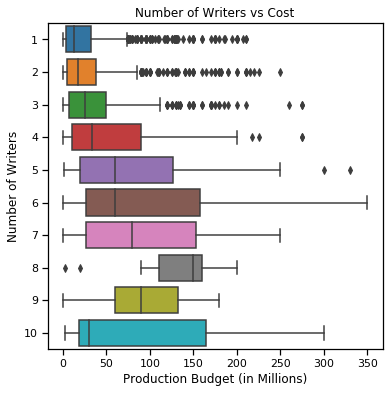

In [113]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='production_budget',y='num_writers',data=df.query('num_writers<11 & production_budget<380'),orient = 'h')
ax.set(ylabel='Number of Writers',xlabel='Production Budget (in Millions)',title='Number of Writers vs Cost')

[Text(0, 0.5, 'Number of Writers'),
 Text(0.5, 0, 'Worldwide Gross (in Millions)'),
 Text(0.5, 1.0, 'Number of Writers vs Revenue')]

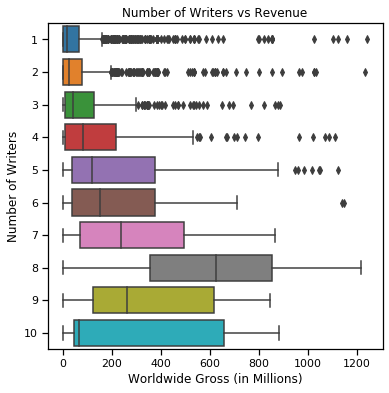

In [112]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='worldwide_gross',y='num_writers',data=df.query('num_writers<11 & worldwide_gross<1250'),orient='h')
ax.set(ylabel='Number of Writers',xlabel='Worldwide Gross (in Millions)',title='Number of Writers vs Revenue')

In [75]:
df.corr()

,production_budget,domestic_gross,worldwide_gross,num_writers,num_directors
production_budget,1.000000,0.721550,0.771622,0.317620,0.014774
domestic_gross,0.721550,1.000000,0.949492,0.266695,0.036130
worldwide_gross,0.771622,0.949492,1.000000,0.280309,0.043281
num_writers,0.317620,0.266695,0.280309,1.000000,0.240984
num_directors,0.014774,0.036130,0.043281,0.240984,1.000000


Interesting correlation coefficient:
- number writers x production budget: 0.31762
- number writers x domestic gross/worldwide gross: 0.266695/0.280309
- production budget x d gross/ww gross: 0.721550/0.771622